In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v4.1_wasting_treatment/ciff_sam/2021_09_24_16_36_30/count_data/'

In [60]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [61]:
state_pt = pd.read_csv(output_dir +'wasting_transition_count.csv')
state_pt.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,sq_lns,wasting_treatment,age
0,0,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,covered,uncovered,early_neonatal
2,2,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,uncovered,uncovered,early_neonatal
4,4,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,covered,covered,late_neonatal


In [62]:
state_pt.measure.unique()

array(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
       'mild_child_wasting_to_susceptible_to_child_wasting_event_count',
       'moderate_acute_malnutrition_to_mild_child_wasting_event_count',
       'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count',
       'severe_acute_malnutrition_to_mild_child_wasting_event_count',
       'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count',
       'susceptible_to_child_wasting_to_mild_child_wasting_event_count'],
      dtype=object)

In [75]:
def calculate_wasting_incidence_reduction(groupby_cols):
    data = pd.read_csv(output_dir + 'wasting_transition_count.csv')
    data = data.loc[data.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
                                      'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count'])]
    data = data.groupby(groupby_cols).sum()['value'].reset_index()
    baseline = data.loc[data.scenario=='baseline'].set_index([c for c in groupby_cols if c != 'scenario']).drop(columns='scenario')
    pct_reduction = (baseline - data.set_index(groupby_cols)) / baseline * 100
    pct_reduction = pct_reduction.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
    return pct_reduction

calculate_wasting_incidence_reduction(['input_draw','measure','scenario'])

value  \
                                                                     count   
measure                                            scenario                  
mild_child_wasting_to_moderate_acute_malnutriti... baseline           12.0   
                                                   sqlns              12.0   
                                                   wasting_treatment  12.0   
moderate_acute_malnutrition_to_severe_acute_mal... baseline           12.0   
                                                   sqlns              12.0   
                                                   wasting_treatment  12.0   

                                                                                 \
                                                                           mean   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               7.609589   
                                                   wasting_treatment  -3.842626   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              20.148231   
                                                   wasting_treatment  11.756374   

                                                                                \
                                                                           std   
measure                                            scenario                      
mild_child_wasting_to_moderate_acute_malnutriti... baseline           0.000000   
                                                   sqlns              2.214141   
                                                   wasting_treatment  0.562029   
moderate_acute_malnutrition_to_severe_acute_mal... baseline           0.000000   
                                                   sqlns              1.809645   
                                                   wasting_treatment  1.662064   

                                                                                 \
                                                                            min   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               3.649995   
                                                   wasting_treatment  -4.781748   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              16.894120   
                                                   wasting_treatment   9.469404   

                                                                                 \
                                                                           2.5%   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               4.101133   
                                                   wasting_treatment  -4.757713   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              17.161242   
                                                   wasting_treatment   9.481900   

                                                                                 \
                                                                            50%   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   

In [77]:
def calculate_wasting_prevalence_reduction(groupby_cols):
    data = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
    #data = data.loc[data.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
    #                                  'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count'])]
    data = data.groupby(groupby_cols).sum()['value'].reset_index()
    baseline = data.loc[data.scenario=='baseline'].set_index([c for c in groupby_cols if c != 'scenario']).drop(columns='scenario')
    pct_reduction = (baseline - data.set_index(groupby_cols)) / baseline * 100
    pct_reduction = pct_reduction.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
    return pct_reduction

calculate_wasting_prevalence_reduction(['input_draw','cause','scenario'])

value                       \
                                               count       mean       std   
cause                        scenario                                       
mild_child_wasting           baseline           12.0   0.000000  0.000000   
                             sqlns              12.0  -5.655375  0.528795   
                             wasting_treatment  12.0  -3.352013  0.484809   
moderate_acute_malnutrition  baseline           12.0   0.000000  0.000000   
                             sqlns              12.0  18.262317  1.557632   
                             wasting_treatment  12.0  10.600773  1.455811   
severe_acute_malnutrition    baseline           12.0   0.000000  0.000000   
                             sqlns              12.0  18.085251  2.957462   
                             wasting_treatment  12.0  12.071117  3.457615   
susceptible_to_child_wasting baseline           12.0   0.000000  0.000000   
                             sqlns              12.0  -0.872031  0.081909   
                             wasting_treatment  12.0  -0.525820  0.076823   

                                                                      \
                                                      min       2.5%   
cause                        scenario                                  
mild_child_wasting           baseline            0.000000   0.000000   
                             sqlns              -6.428872  -6.403692   
                             wasting_treatment  -4.170930  -4.141355   
moderate_acute_malnutrition  baseline            0.000000   0.000000   
                             sqlns              15.436002  15.682815   
                             wasting_treatment   8.475658   8.536294   
severe_acute_malnutrition    baseline            0.000000   0.000000   
                             sqlns              14.317258  14.590313   
                             wasting_treatment   5.694553   6.593145   
susceptible_to_child_wasting baseline            0.000000   0.000000   
                             sqlns              -0.968704  -0.968271   
                             wasting_treatment  -0.661436  -0.652788   

                                                                      \
                                                      50%      97.5%   
cause                        scenario                                  
mild_child_wasting           baseline            0.000000   0.000000   
                             sqlns              -5.633502  -4.834503   
                             wasting_treatment  -3.263345  -2.595715   
moderate_acute_malnutrition  baseline            0.000000   0.000000   
                             sqlns              18.136259  20.427047   
                             wasting_treatment  10.482662  13.254008   
severe_acute_malnutrition    baseline            0.000000   0.000000   
                             sqlns              17.254943  23.608413   
                             wasting_treatment  11.939338  18.225068   
susceptible_to_child_wasting baseline            0.000000   0.000000   
                             sqlns              -0.866665  -0.726907   
                             wasting_treatment  -0.518159  -0.404090   

                                                           
                                                      max  
cause                        scenario                      
mild_child_wasting           baseline            0.000000  
                             sqlns              -4.747989  
                             wasting_treatment  -2.439084  
moderate_acute_malnutrition  baseline            0.000000  
                             sqlns              20.442996  
                             wasting_treatment  13.401886  
severe_acute_malnutrition    baseline            0.000000  
                             sqlns              24.216685  
                             wasting_treatment  19.423542  
susceptib

In [7]:
groupby_cols = ['scenario','input_draw','cause']

def calculate_child_growth_exposure_prevalence(risk, groupby_cols, six_to_59_months_and_2023_plus=True):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    if six_to_59_months_and_2023_plus==True:
        state_pt = state_pt.loc[state_pt.year>=2023].loc[state_pt.age.isin(['6-11_months',
           '12_to_23_months', '2_to_4'])]
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    elif risk=='stunting':
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


scenario                         cause   value             \
                                                      count       mean   
0            baseline            mild_child_wasting  1200.0  21.640459   
1            baseline   moderate_acute_malnutrition  1200.0   7.857995   
2            baseline     severe_acute_malnutrition  1200.0   1.759118   
3            baseline  susceptible_to_child_wasting  1200.0  68.742428   
4            baseline                        wasted  1200.0   9.617113   
10  wasting_treatment            mild_child_wasting  1200.0  22.634158   
11  wasting_treatment   moderate_acute_malnutrition  1200.0   6.691204   
12  wasting_treatment     severe_acute_malnutrition  1200.0   1.440527   
13  wasting_treatment  susceptible_to_child_wasting  1200.0  69.234111   
14  wasting_treatment                        wasted  1200.0   8.131731   
5               sqlns            mild_child_wasting  1200.0  23.315913   
6               sqlns   moderate_acute_malnutrition  1200.0   5.846974   
7               sqlns     severe_acute_malnutrition  1200.0   1.283160   
8               sqlns  susceptible_to_child_wasting  1200.0  69.553952   
9               sqlns                        wasted  1200.0   7.130135   

                                                                    order  
         std        min       2.5%        50%      97.5%        max        
0   0.126534  21.381628  21.412548  21.648894  21.823084  21.844107     0  
1   0.083578   7.727455   7.733405   7.849871   7.985982   7.988134     0  
2   0.098718   1.616103   1.632610   1.732569   1.956996   1.993433     0  
3   0.154824  68.512288  68.529290  68.703652  69.018467  69.052131     0  
4   0.175935   9.343558   9.373875   9.573911   9.942978   9.981567     0  
10  0.177861  22.373996  22.410870  22.577149  22.978880  22.989409     1  
11  0.192972   6.330914   6.356045   6.719852   6.980170   7.008131     1  
12  0.067394   1.356558   1.361760   1.422931   1.565318   1.586177     1  
13  0.162143  68.944572  68.994624  69.200122  69.523833  69.560411     1  
14  0.244734   7.687472   7.723961   8.169656   8.503457   8.507563     1  
5   0.210705  22.984853  22.995114  23.300226  23.619525  23.632719     2  
6   0.178598   5.508047   5.546297   5.855941   6.101258   6.137159     2  
7   0.048211   1.203390   1.212749   1.275989   1.360343   1.361775     2  
8   0.123876  69.316092  69.352475  69.555573  69.728729  69.729744     2  
9   0.207302   6.711437   6.763668   7.157487   7.383813   7.399548     2

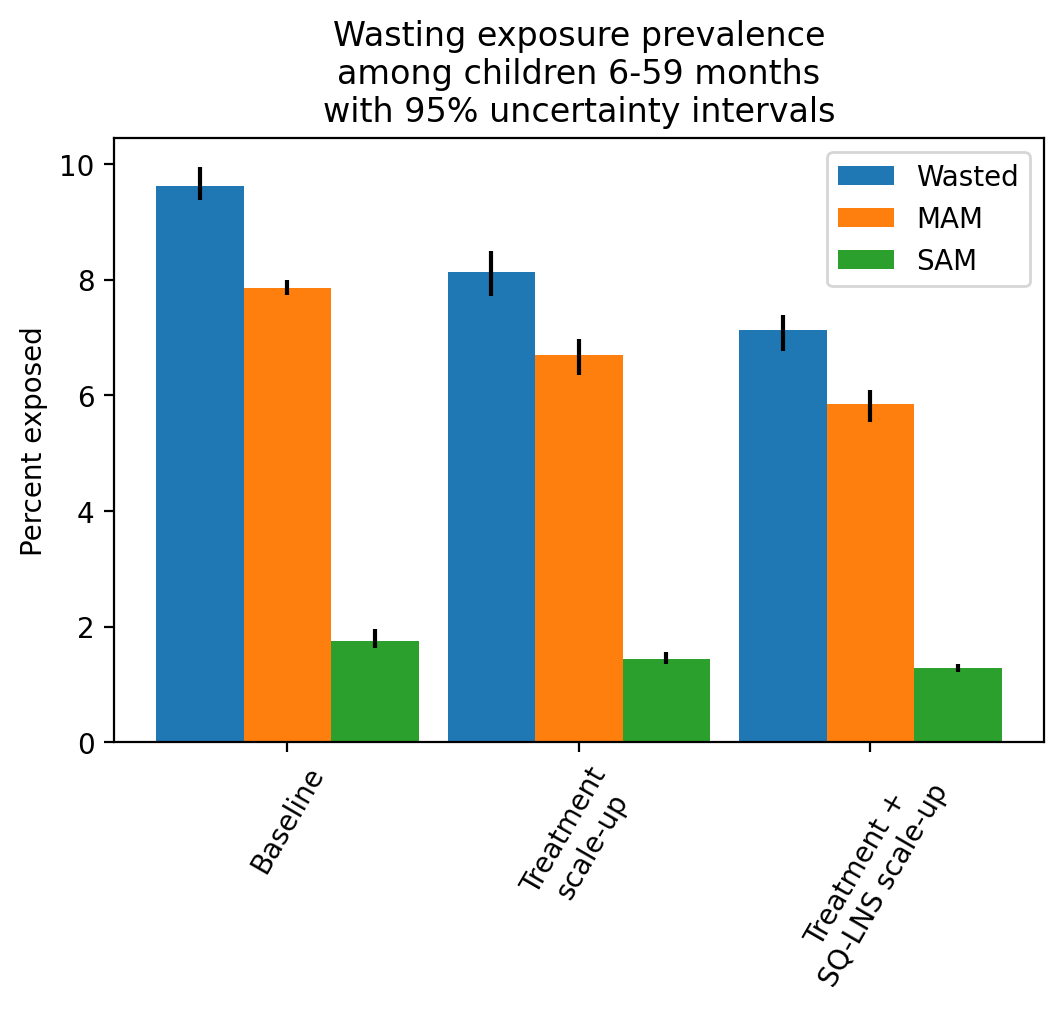

In [52]:
p = calculate_child_growth_exposure_prevalence('wasting', groupby_cols, True).reset_index()
p['order'] = np.where(p.scenario=='baseline', 0, np.where(p.scenario=='wasting_treatment', 1, 2))
p['value'] = p['value'] * 100
p = p.sort_values(by='order')
barWidth = 0.3
x_vals = [0,1,2,3]
labels = ['Wasted','MAM','SAM']
causes = ['wasted','moderate_acute_malnutrition','severe_acute_malnutrition']
scenarios = ['Baseline','Treatment\nscale-up', 'Treatment +\nSQ-LNS scale-up']
plt.figure(dpi=200)
for i in list(range(0,len(labels))):
    x = p.loc[p.cause==causes[i]]
    plt.bar([0+i*barWidth, 1+i*barWidth, 2+i*barWidth],
            x['value','mean'], yerr=[x['value','mean'] - x['value','2.5%'], 
                                              x['value','97.5%'] - x['value','mean']], 
            width=barWidth,
            label=labels[i])
plt.legend()
plt.xticks([r + 1*barWidth  for r in range(3)], scenarios, rotation=60)
plt.ylabel('Percent exposed')
plt.title('Wasting exposure prevalence\namong children 6-59 months\nwith 95% uncertainty intervals')

p

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


scenario                         cause   value             \
                                                      count       mean   
0            baseline            mild_child_wasting  1200.0  21.448709   
1            baseline   moderate_acute_malnutrition  1200.0   7.933944   
2            baseline     severe_acute_malnutrition  1200.0   1.885512   
3            baseline  susceptible_to_child_wasting  1200.0  68.731834   
4            baseline                        wasted  1200.0   9.819457   
10  wasting_treatment            mild_child_wasting  1200.0  22.165410   
11  wasting_treatment   moderate_acute_malnutrition  1200.0   7.092414   
12  wasting_treatment     severe_acute_malnutrition  1200.0   1.655724   
13  wasting_treatment  susceptible_to_child_wasting  1200.0  69.086452   
14  wasting_treatment                        wasted  1200.0   8.748138   
5               sqlns            mild_child_wasting  1200.0  22.657165   
6               sqlns   moderate_acute_malnutrition  1200.0   6.483488   
7               sqlns     severe_acute_malnutrition  1200.0   1.542203   
8               sqlns  susceptible_to_child_wasting  1200.0  69.317144   
9               sqlns                        wasted  1200.0   8.025691   

                                                                    order  
         std        min       2.5%        50%      97.5%        max        
0   0.121517  21.189036  21.220367  21.451255  21.629870  21.643300     0  
1   0.083526   7.815539   7.817050   7.933410   8.060115   8.064115     0  
2   0.099068   1.760311   1.766467   1.864494   2.084866   2.124060     0  
3   0.160300  68.502624  68.513930  68.695254  69.020175  69.053313     0  
4   0.176317   9.581344   9.598497   9.791662  10.144982  10.188174     0  
10  0.149191  21.950694  21.974342  22.122357  22.438705  22.441350     1  
11  0.149537   6.814280   6.845364   7.118959   7.320600   7.348864     1  
12  0.065597   1.566320   1.568211   1.651652   1.755066   1.767998     1  
13  0.159403  68.814195  68.861977  69.036401  69.384806  69.420132     1  
14  0.200954   8.387476   8.430295   8.763140   9.054504   9.069837     1  
5   0.174078  22.378891  22.402694  22.625612  22.897545  22.898177     2  
6   0.128824   6.221024   6.261456   6.479550   6.659334   6.671630     2  
7   0.052768   1.462756   1.466619   1.546079   1.608523   1.609423     2  
8   0.131069  69.082007  69.110906  69.293085  69.531438  69.539683     2  
9   0.160008   7.683779   7.743220   8.060114   8.211854   8.213115     2

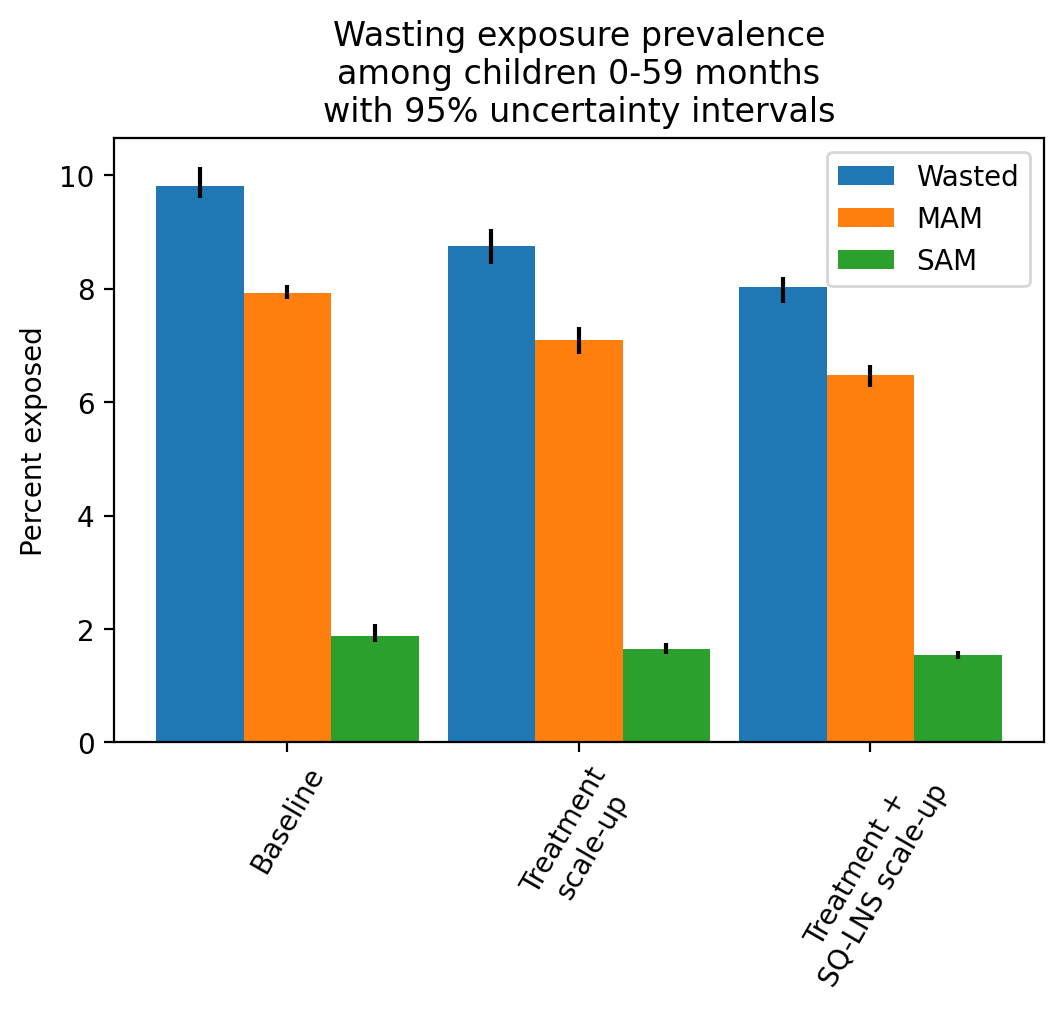

In [53]:
p = calculate_child_growth_exposure_prevalence('wasting', groupby_cols, False).reset_index()
p['order'] = np.where(p.scenario=='baseline', 0, np.where(p.scenario=='wasting_treatment', 1, 2))
p['value'] = p['value'] * 100
p = p.sort_values(by='order')
barWidth = 0.3
x_vals = [0,1,2,3]
labels = ['Wasted','MAM','SAM']
causes = ['wasted','moderate_acute_malnutrition','severe_acute_malnutrition']
scenarios = ['Baseline','Treatment\nscale-up', 'Treatment +\nSQ-LNS scale-up']
plt.figure(dpi=200)
for i in list(range(0,len(labels))):
    x = p.loc[p.cause==causes[i]]
    plt.bar([0+i*barWidth, 1+i*barWidth, 2+i*barWidth],
            x['value','mean'], yerr=[x['value','mean'] - x['value','2.5%'], 
                                              x['value','97.5%'] - x['value','mean']], 
            width=barWidth,
            label=labels[i])
plt.legend()
plt.xticks([r + 1*barWidth  for r in range(3)], scenarios, rotation=60)
plt.ylabel('Percent exposed')
plt.title('Wasting exposure prevalence\namong children 0-59 months\nwith 95% uncertainty intervals')
p

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


scenario    cause   value                                  \
                                 count       mean       std        min   
0            baseline     cat1  1200.0  17.750558  0.606724  16.611522   
1            baseline     cat2  1200.0  19.080599  0.502801  18.404713   
2            baseline     cat3  1200.0  20.749868  0.601415  20.024212   
3            baseline     cat4  1200.0  42.418975  0.672604  41.310862   
4            baseline  stunted  1200.0  36.831157  0.452668  36.206476   
10  wasting_treatment     cat1  1200.0  17.751718  0.606781  16.613538   
11  wasting_treatment     cat2  1200.0  19.080722  0.502804  18.404952   
12  wasting_treatment     cat3  1200.0  20.749518  0.601415  20.023763   
13  wasting_treatment     cat4  1200.0  42.418043  0.672425  41.309913   
14  wasting_treatment  stunted  1200.0  36.832439  0.452578  36.209023   
5               sqlns     cat1  1200.0  15.057338  1.064425  12.981940   
6               sqlns     cat2  1200.0  17.890866  0.714890  16.636675   
7               sqlns     cat3  1200.0  24.637115  1.094418  22.991185   
8               sqlns     cat4  1200.0  42.414681  0.671863  41.305833   
9               sqlns  stunted  1200.0  32.948204  1.179114  30.618062   

                                               order  
         2.5%        50%      97.5%        max        
0   16.806471  17.609922  18.657202  18.712643     0  
1   18.406948  19.083887  19.713941  19.725657     0  
2   20.028214  20.760917  21.756890  21.800069     0  
3   41.458740  42.267939  43.358642  43.414246     0  
4   36.222709  36.862949  37.599128  37.717214     0  
10  16.808181  17.610665  18.658272  18.713937     1  
11  18.407157  19.084425  19.714263  19.726051     1  
12  20.027921  20.760852  21.756297  21.799383     1  
13  41.457856  42.266834  43.357390  43.412982     1  
14  36.225049  36.863998  37.600842  37.719162     1  
5   13.255219  15.088546  16.467152  16.476586     2  
6   16.704116  17.833034  18.923067  18.999780     2  
7   23.020918  25.042788  25.917227  25.976970     2  
8   41.454173  42.264181  43.350293  43.404968     2  
9   30.868377  32.954954  34.608232  34.662864     2

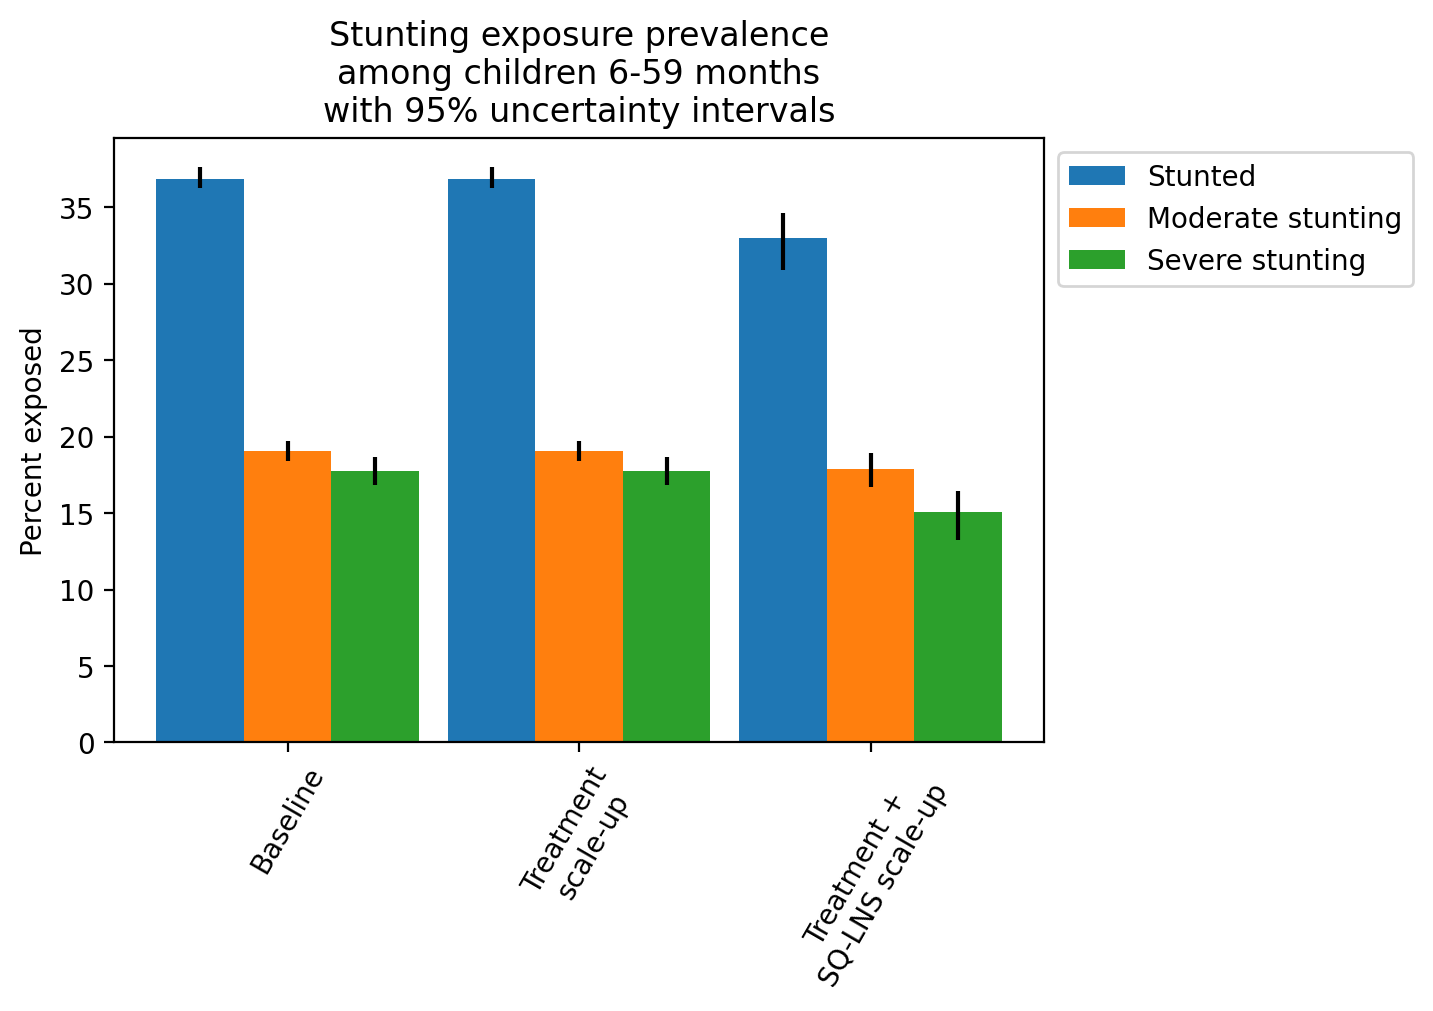

In [58]:
p = calculate_child_growth_exposure_prevalence('stunting', groupby_cols, True).reset_index()
p['order'] = np.where(p.scenario=='baseline', 0, np.where(p.scenario=='wasting_treatment', 1, 2))
p['value'] = p['value'] * 100
p = p.sort_values(by='order')
barWidth = 0.3
x_vals = [0,1,2,3]
labels = ['Stunted','Moderate stunting','Severe stunting']
causes = ['stunted','cat2','cat1']
scenarios = ['Baseline','Treatment\nscale-up', 'Treatment +\nSQ-LNS scale-up']
plt.figure(dpi=200)
for i in list(range(0,len(labels))):
    x = p.loc[p.cause==causes[i]]
    plt.bar([0+i*barWidth, 1+i*barWidth, 2+i*barWidth],
            x['value','mean'], yerr=[x['value','mean'] - x['value','2.5%'], 
                                              x['value','97.5%'] - x['value','mean']], 
            width=barWidth,
            label=labels[i])
plt.legend(bbox_to_anchor=[1,1])
plt.xticks([r + 1*barWidth  for r in range(3)], scenarios, rotation=60)
plt.ylabel('Percent exposed')
plt.title('Stunting exposure prevalence\namong children 6-59 months\nwith 95% uncertainty intervals')

p

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


scenario    cause   value                                  \
                                 count       mean       std        min   
0            baseline     cat1  1200.0  16.386355  0.542896  15.396061   
1            baseline     cat2  1200.0  18.137948  0.437062  17.530269   
2            baseline     cat3  1200.0  20.401279  0.534246  19.739034   
3            baseline     cat4  1200.0  45.074418  0.592426  44.096348   
4            baseline  stunted  1200.0  34.524303  0.404371  33.960937   
10  wasting_treatment     cat1  1200.0  16.387325  0.542962  15.397659   
11  wasting_treatment     cat2  1200.0  18.138128  0.437062  17.530552   
12  wasting_treatment     cat3  1200.0  20.401060  0.534237  19.738746   
13  wasting_treatment     cat4  1200.0  45.073487  0.592292  44.095398   
14  wasting_treatment  stunted  1200.0  34.525453  0.404314  33.963031   
5               sqlns     cat1  1200.0  14.444324  0.818608  12.945293   
6               sqlns     cat2  1200.0  17.279918  0.574066  16.293879   
7               sqlns     cat3  1200.0  23.204970  0.832312  21.902957   
8               sqlns     cat4  1200.0  45.070789  0.591911  44.092026   
9               sqlns  stunted  1200.0  31.724242  0.896976  29.932477   

                                               order  
         2.5%        50%      97.5%        max        
0   15.551852  16.271328  17.178398  17.213693     0  
1   17.534853  18.152974  18.687963  18.701024     0  
2   19.741125  20.332736  21.313765  21.341725     0  
3   44.240324  44.895603  45.882591  45.923512     0  
4   33.982234  34.545552  35.230054  35.321450     0  
10  15.553225  16.271991  17.179317  17.214767     1  
11  17.535111  18.153432  18.688285  18.701406     1  
12  19.740950  20.332730  21.313388  21.341285     1  
13  44.239327  44.894845  45.881575  45.922312     1  
14  33.984180  34.546536  35.231527  35.323080     1  
5   13.096969  14.490390  15.552348  15.601977     2  
6   16.331838  17.264537  18.117727  18.171107     2  
7   21.940813  23.471581  24.192025  24.207439     2  
8   44.236124  44.893046  45.876623  45.916137     2  
9   30.149632  31.718422  33.074203  33.119985     2

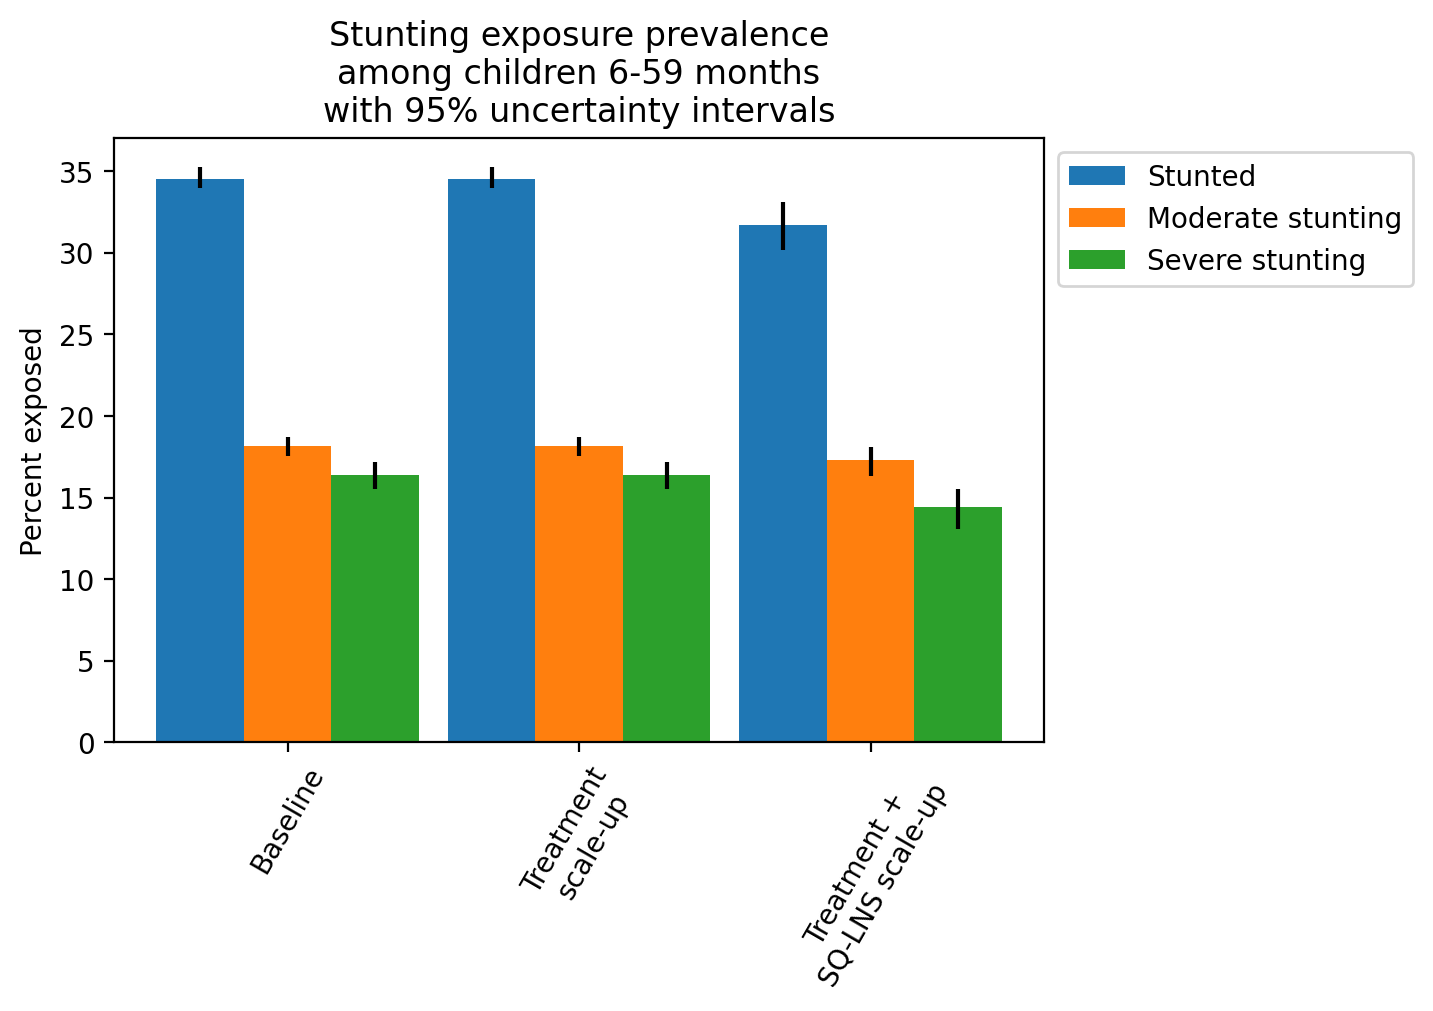

In [59]:
p = calculate_child_growth_exposure_prevalence('stunting', groupby_cols, False).reset_index()
p['order'] = np.where(p.scenario=='baseline', 0, np.where(p.scenario=='wasting_treatment', 1, 2))
p['value'] = p['value'] * 100
p = p.sort_values(by='order')
barWidth = 0.3
x_vals = [0,1,2,3]
labels = ['Stunted','Moderate stunting','Severe stunting']
causes = ['stunted','cat2','cat1']
scenarios = ['Baseline','Treatment\nscale-up', 'Treatment +\nSQ-LNS scale-up']
plt.figure(dpi=200)
for i in list(range(0,len(labels))):
    x = p.loc[p.cause==causes[i]]
    plt.bar([0+i*barWidth, 1+i*barWidth, 2+i*barWidth],
            x['value','mean'], yerr=[x['value','mean'] - x['value','2.5%'], 
                                              x['value','97.5%'] - x['value','mean']], 
            width=barWidth,
            label=labels[i])
plt.legend(bbox_to_anchor=[1,1])
plt.xticks([r + 1*barWidth  for r in range(3)], scenarios, rotation=60)
plt.ylabel('Percent exposed')
plt.title('Stunting exposure prevalence\namong children 6-59 months\nwith 95% uncertainty intervals')

p